# Capstone: Predicting IPL outcomes

# Notebook 2: Investigating the dataset

## Project summary

Sports betting is a billion-dollar industry. Cricket betting, albeit small compared to football or baseball, was still valued at USD10 billion annually with a further USD40 to USD50 billion in [illegal bets](http://www.espncricinfo.com/pakistan/content/story/535250.html) (often from India and Pakistan where betting is banned). Models that can consistently predict outcomes and beat the odds of bookmakers can therefore have great value.

This project aims to predict the outcome of Indian Premier League (IPL) matches. The IPL, a professional Twenty20 cricket league in India, is the richest tournament in cricket. It is contested annually in April and May. While the teams represent Indian cities (and in some cases a state), it attracts the best players from around the (cricket-playing) world.

The rules of cricket can seem quite involved, this [link](https://www.youtube.com/watch?v=AqtpNkMvj5Y) provides a 5 minute introduction 

The bulk of the data is available from a Kaggle [dataset](https://www.kaggle.com/manasgarg/ipl/data) which includes ball-by-ball information for each of the games between 2008 - 2017 (636 games in total) as well as a separate database with match level information. 

## Notebook 2: Summary

This notebook takes the dataset processed in Notebook 1 and performs some descriptive statistics to inform modeling choices in Notebook 3. Note that this summary reproduces tables and figures generated below, hence the code in the rest of the notebook should be run before the code in the summary.

The format of the IPL has changed over the years. The league experimented with some different formats in 2011 – 2013, introducing extra teams. However, in 2014 the format returned to 8 teams playing a round robin format followed by semi-finals and finals. Note that games draw or abandoned have already been removed from the figure below.


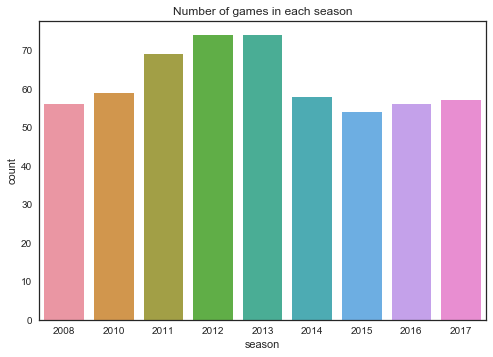

In [17]:
# Games across seasons
sns.set(style="white")
sns.countplot(x='season', data=games)
plt.title('Number of games in each season')
plt.show()

When the IPL was introduced in 2008, the format of the game – T20, a quicker format than one day or test matches – was still relatively new. The first T20 international match was only played in 2005. Since then the game and tactics used has changed drastically, with the IPL often the main experimental tournament. Combined with the league itself maturing and teams became more stable the games have become more competitive throughout the seasons. The closer games are the more difficult to predict, therefore high accuracy scores may not be possible.

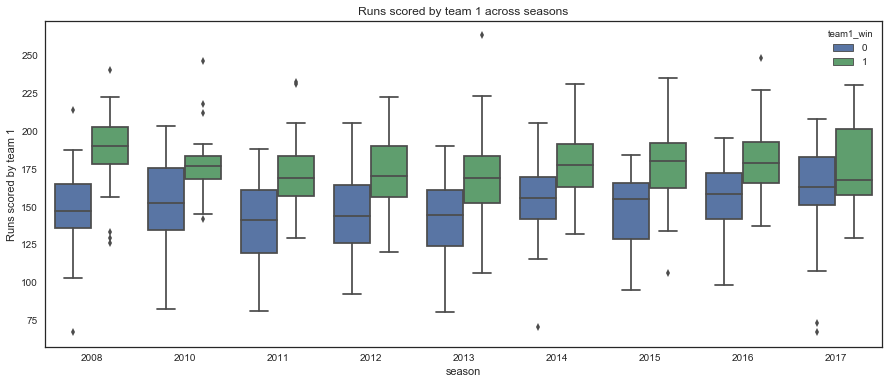

In [18]:
# Number of runs across seasons (1st innings)
plt.figure(figsize=(15,6))
sns.boxplot(x=games.season, y=games.runs_1st, data=games, hue='team1_win')
plt.title('Runs scored by team 1 across seasons')
plt.ylabel('Runs scored by team 1')
plt.show()

However, measuring the competitiveness of games is – as with many cricket issues – not straight forward. The score of the team batting second can never be substantially higher than the team that batted first, as this would end the game (the maximum that a team batting second could outscore another team would technically be six). The figure below shows many more games as close (a small run difference), but which may in fact have been easy run chances for the team batting second. Even taking this into account shows that the spread of run difference has narrowed over the seasons.

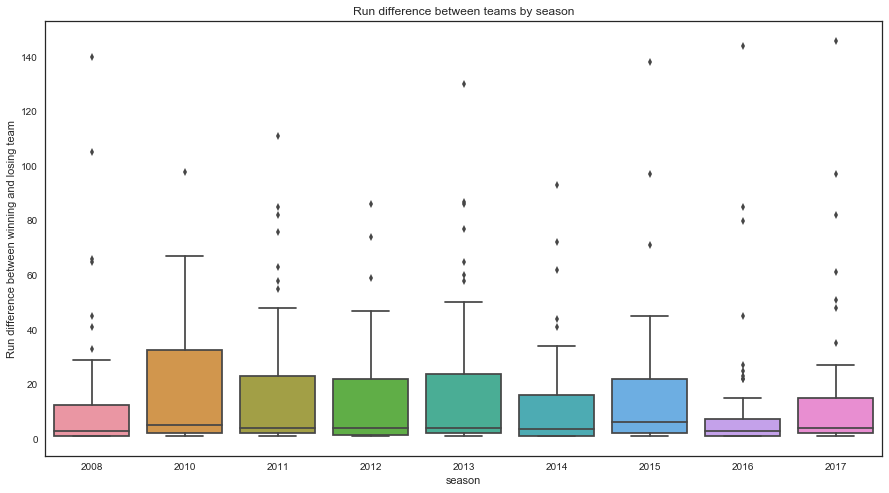

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x=games.season, y=games.runs_diff, data=games)
plt.title('Run difference between teams by season')
plt.ylabel('Run difference between winning and losing team')
plt.show()

This can also be seen from the distribution of the runs of the team batting first and second with the team batting second's distribution shifted to the left. This does not mean that batting second is a disadvantage. In fact, most team prefer to bat second.

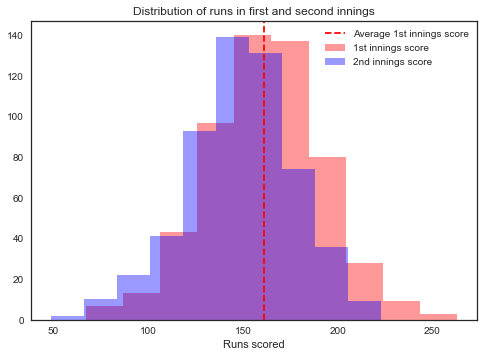

In [23]:
plt.hist(first, alpha = 0.4, color = 'r', label = '1st innings score',)
plt.hist(second, alpha = 0.4, color = 'b', label = '2nd innings score')
plt.axvline(first.mean(), label = 'Average 1st innings score', color='r', linestyle = 'dashed')
plt.legend()
plt.xlabel('Runs scored')
plt.title('Distribution of runs in first and second innings')
plt.show()

Interesting, what makes a good score has stayed relatively constant over the seasons. The figure below shows a scatter plot per season of only the winning scores. The average winning score across all seasons is 162.

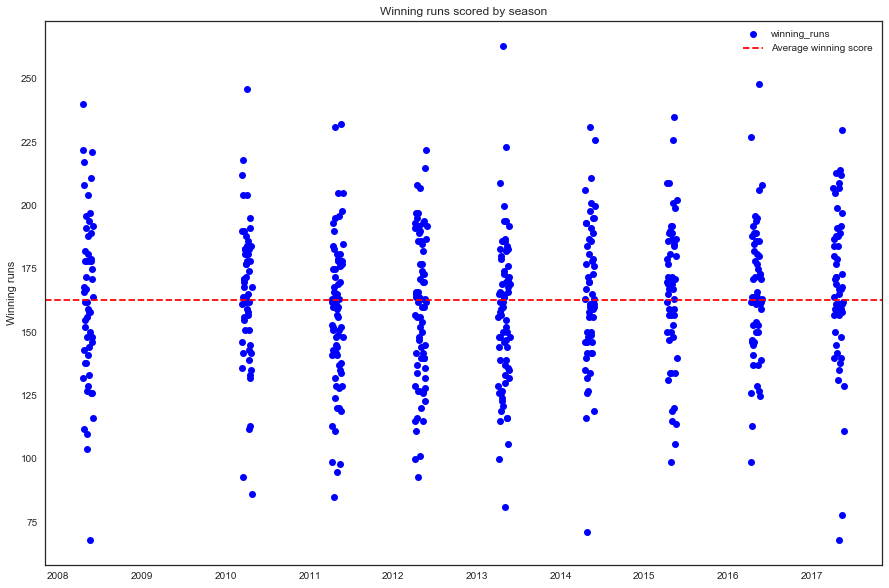

In [25]:
plt.figure(figsize=(15,10))
plt.plot(x, y2, 'bo')
plt.axhline(y2.mean(), label = 'Average winning score', color='r', linestyle = 'dashed')
plt.legend()
plt.ylabel('Winning runs')
plt.title('Winning runs scored by season')
#plt.plot(x, y2, 'bo')
plt.show()

The home team feature – created in Notebook 1 – is somewhat noisy. Teams do not consistently play at a specific venue and in some cases shared a home ground. This means the feature may be noisy. A first glance at the data shows that it is still worth including. Home teams, on average, win more games.

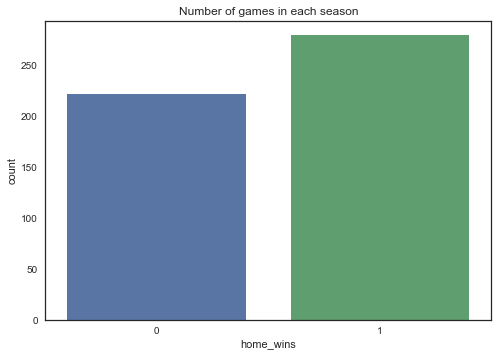

In [28]:
sns.countplot(x='home_wins', data=home_bias)
plt.title('Number of games in each season')
plt.show()

 The win ratio is broken down by city below. Clearly there are some strong home side performances, but also several teams that still lose more games than they win at home. This may reflect a lesser home bias, but could also just be a measure of a poorly performing team (which then performed slightly better at home, but not enough to win).

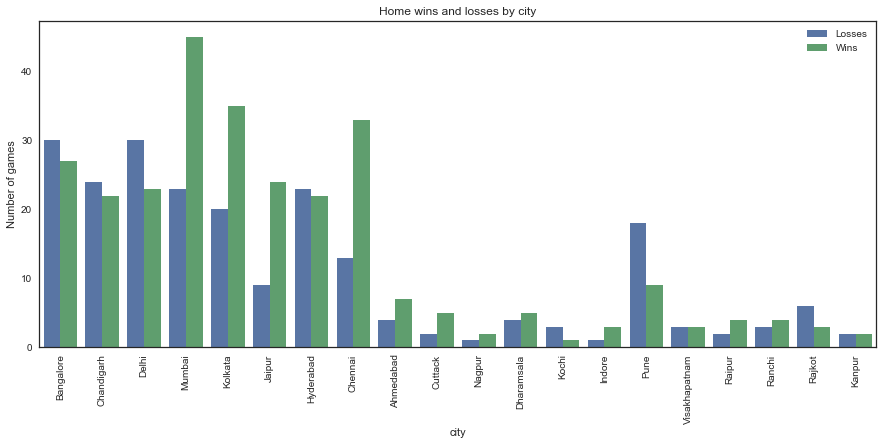

In [30]:
plt.figure(figsize=(15,6))
g = sns.countplot(x='city', hue='home_wins', data=home_bias)
plt.xticks(rotation=90)
plt.title('Home wins and losses by city')
plt.ylabel('Number of games')
plt.legend(['Losses', 'Wins'])
plt.show()

Another way to measure home team bias is by investigating runs scored at home versus away. Here again there is the consideration whether the team batted first or second (batting second limits the amount that the team can score). However, this is not expected to bias the aggregate results show below. 

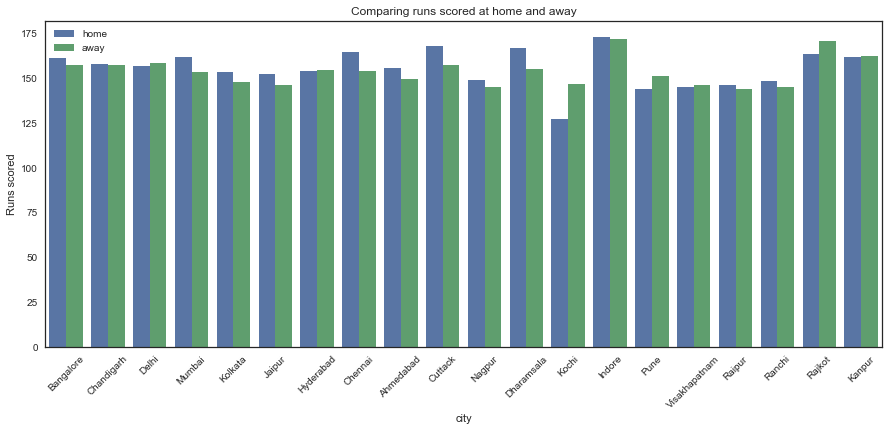

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x='city', y='runs', hue='home_away', data=home_bias, ci=None)
plt.legend(['home', 'away'], loc='best')
plt.title('Comparing runs scored at home and away')
plt.ylabel('Runs scored')
plt.xticks(rotation=45)
plt.show()

Moving on to individual players. The next two plots show the importance of the top batsmen and bowlers in the team. However, it also shows some of the intricacies of cricket statistics. A batsman’s average is determined by the number of runs he scored, divided by how many times that player went out. This means a relatively poor batsman can have a high average if he’s only batted a few times and managed not to go out (through some further cricket intricacies this is possible…). The strike rate (runs per ball), hides how many balls a player has faced. Scoring ten runs off five balls before going out gives one a world class strike rate, but doesn’t help the team much.

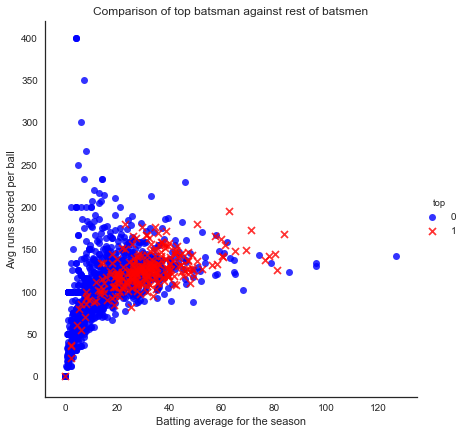

In [43]:
g = sns.lmplot(x='avgs', y='strike_rate',
           data=batting, hue = 'top', markers=["o", "x"], palette = {0:'b', 1:'r'},
           fit_reg=False, size=6)
plt.title('Comparison of top batsman against rest of batsmen')
plt.ylabel('Avg runs scored per ball')
plt.xlabel('Batting average for the season')
plt.show()

Measuring bowler performance gets even trickier. Bowling average (runs per wicket) and bowling strike rate (balls per wicket) both rely on taking wickets, but a bowler can also be there to contain the scoring rate and have therefore have a good economy (runs per balls). Generally good bowlers should be in the bottom left quadrant - closest to 0.

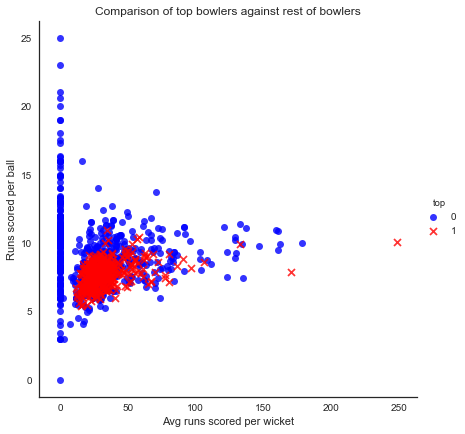

In [44]:
g = sns.lmplot(x='bowling_avg', y='economy',
           data=bowling, hue = 'top', markers=["o", "x"], palette = {0:'b', 1:'r'},
           fit_reg=False, size=6)
plt.title('Comparison of top bowlers against rest of bowlers')
plt.ylabel('Runs scored per ball')
plt.xlabel('Avg runs scored per wicket')
plt.show()

IPL teams follow an auctioning system for players. However, how much does a world class batsman contribute? The figure below shows the runs contributed by the top 3 batsman per team. IPL teams follow an auctioning system for players. However, how much does a world class batsman contribute? The figure below shows the runs contributed by the top 3 batsman per team, which is close to 50 per cent of total runs!

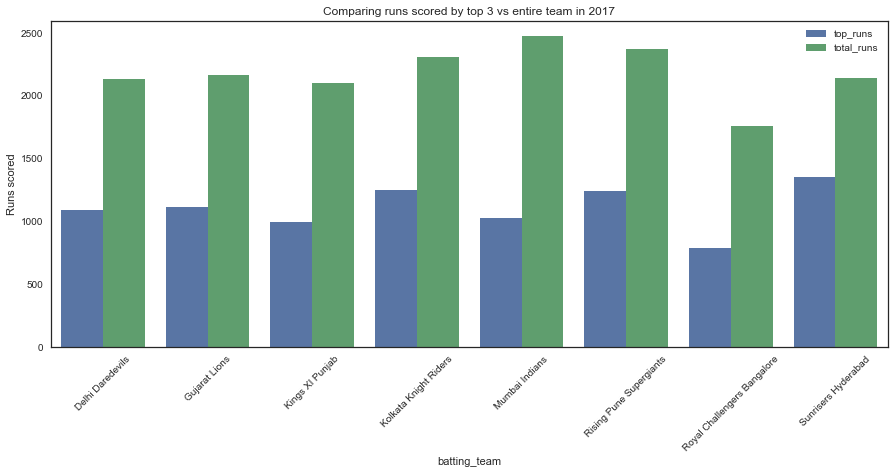

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x='batting_team', y='runs', hue='contribution', data=temp, ci=None)
plt.legend(loc='best')
plt.title('Comparing runs scored by top 3 vs entire team in 2017')
plt.ylabel('Runs scored')
plt.xticks(rotation=45)
plt.show()

# The full code

*Note: This has to be run before summary figures can be generated*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
% matplotlib inline
import seaborn as sns

In [2]:
games = pd.read_csv('matches_updated.csv')
games.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,...,team1_total_runs,team2_total_runs,team1_bat_strike,team2_bat_strike,team1_bowl_avg,team2_bowl_avg,team1_bowl_strike,team2_bowl_strike,team1_bowl_econ,team2_bowl_econ
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,...,283.000000,210.571429,140.141978,124.361994,64.266562,33.864831,41.861844,24.179365,8.415585,8.128939
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,Rising Pune Supergiants,...,294.285714,322.000000,132.086532,130.395824,29.264901,24.644323,23.391817,20.486179,7.520773,7.280775
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,...,287.142857,290.142857,143.623532,142.599870,56.936111,30.707516,36.400000,22.357734,9.224123,8.291170
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,...,322.000000,259.428571,130.395824,139.994981,24.644323,26.471885,20.486179,19.738987,7.280775,8.188582
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,...,210.571429,257.857143,124.361994,136.818079,33.864831,34.731250,24.179365,24.727083,8.128939,8.234443


In [3]:
# date to datetime
games.date = pd.to_datetime(games.date, format="%Y-%m-%d")

# Sort on date
games.sort_values('date', inplace=True)

## Evolution of IPL

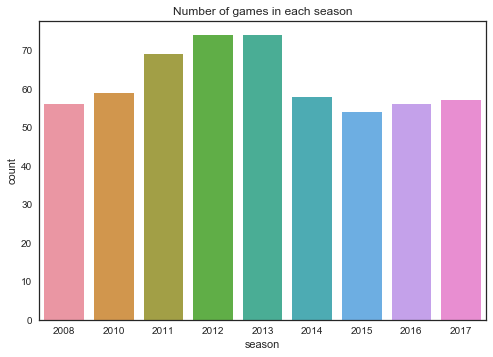

In [4]:
# Games across seasons
sns.set(style="white")
sns.countplot(x='season', data=games)
plt.title('Number of games in each season')
plt.show()

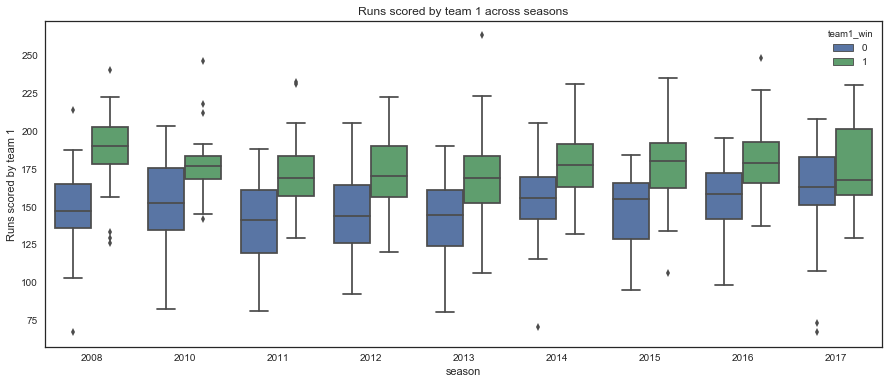

In [5]:
# Number of runs across seasons (1st innings)
plt.figure(figsize=(15,6))
sns.boxplot(x=games.season, y=games.runs_1st, data=games, hue='team1_win')
plt.title('Runs scored by team 1 across seasons')
plt.ylabel('Runs scored by team 1')
plt.show()

Distribution of runs seem relatively normal. Note the narrowing of gap between winning and losing runs scored in later seasons. This will make prediction more difficult.

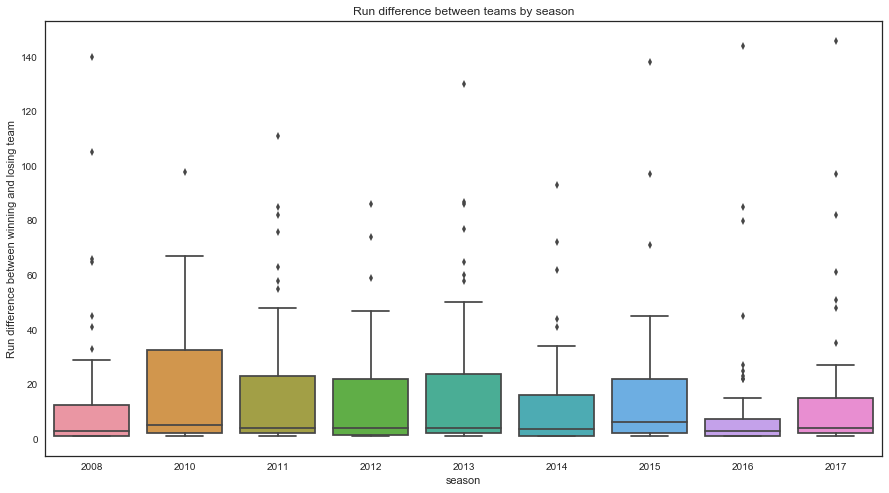

In [19]:
# Runs scored winning team versus losing team by season
games['winning_runs'] = games.apply(lambda x: x.runs_1st if x.team1_win==1 else x.runs_2nd, axis=1)
games['losing_runs'] = games.apply(lambda x: x.runs_1st if x.team1_win==0 else x.runs_2nd, axis=1)
games['runs_diff'] = games['winning_runs'] - games['losing_runs']

plt.figure(figsize=(15,8))
sns.boxplot(x=games.season, y=games.runs_diff, data=games)
plt.title('Run difference between teams by season')
plt.ylabel('Run difference between winning and losing team')
plt.show()

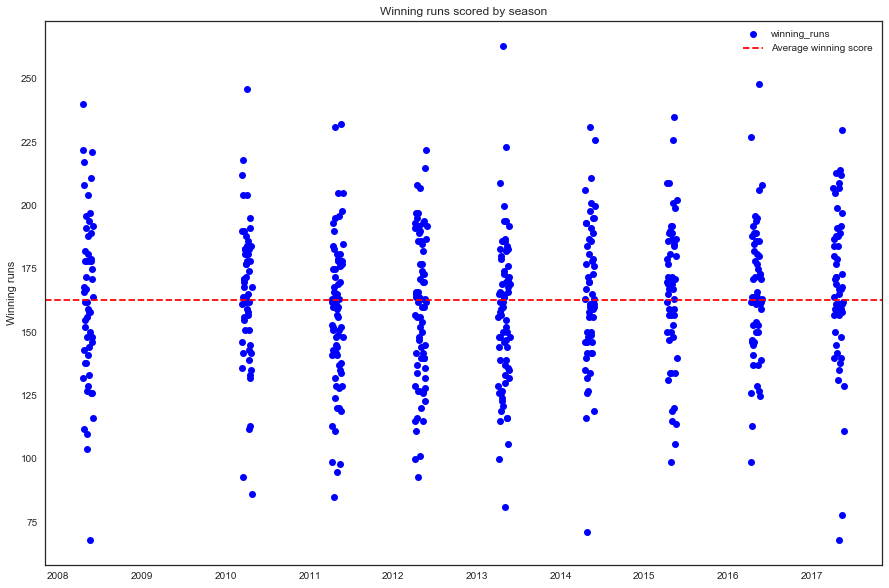

In [24]:
# Runs scored by winning team
x = games.loc[:, 'date']
y2 = games.loc[:, 'winning_runs']

plt.figure(figsize=(15,10))
plt.plot(x, y2, 'bo')
plt.axhline(y2.mean(), label = 'Average winning score', color='r', linestyle = 'dashed')
plt.legend()
plt.ylabel('Winning runs')
plt.title('Winning runs scored by season')
#plt.plot(x, y2, 'bo')
plt.show()

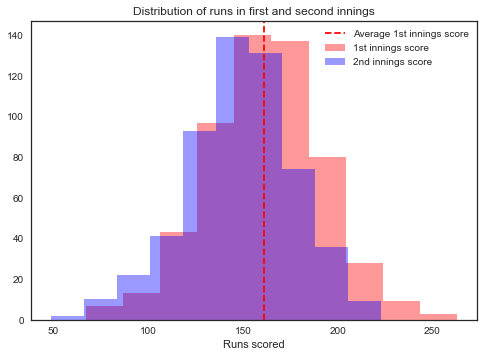

In [22]:
#total = games.loc[:, 'runs_1st'] + games.loc[:, 'runs_2nd']
first = games.loc[:, 'runs_1st']
second = games.loc[:, 'runs_2nd']
#plt.hist(total, alpha = 0.4, color = 'b')
plt.hist(first, alpha = 0.4, color = 'r', label = '1st innings score',)
plt.hist(second, alpha = 0.4, color = 'b', label = '2nd innings score')
plt.axvline(first.mean(), label = 'Average 1st innings score', color='r', linestyle = 'dashed')
plt.legend()
plt.xlabel('Runs scored')
plt.title('Distribution of runs in first and second innings')
plt.show()

## Does home ground advantage matter?

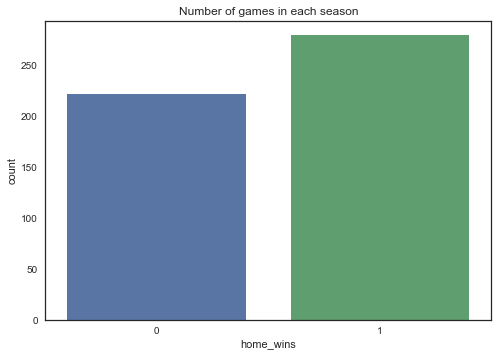

In [27]:
# Figure for home team wins
# First need to remove venues with no home team

home_bias = games.loc[games.home_team != 'No home team', ['winner_id', 'home_team_id', 'city']]

home_bias['home_wins'] = home_bias.apply(lambda x: 1 if x.winner_id==x.home_team_id else 0, axis=1)

sns.countplot(x='home_wins', data=home_bias)
plt.title('Number of games in each season')
plt.show()

In [51]:
home_bias.home_wins.value_counts()[0]/home_bias.home_wins.value_counts().sum()

0.442

So it seems there is a slight home bias. Home teams win 55% of the games. This is smaller than many other sports, however, it is possible that this aggregated data hides some variation within teams - particularly those with a stable home ground which they have not shared with other teams.

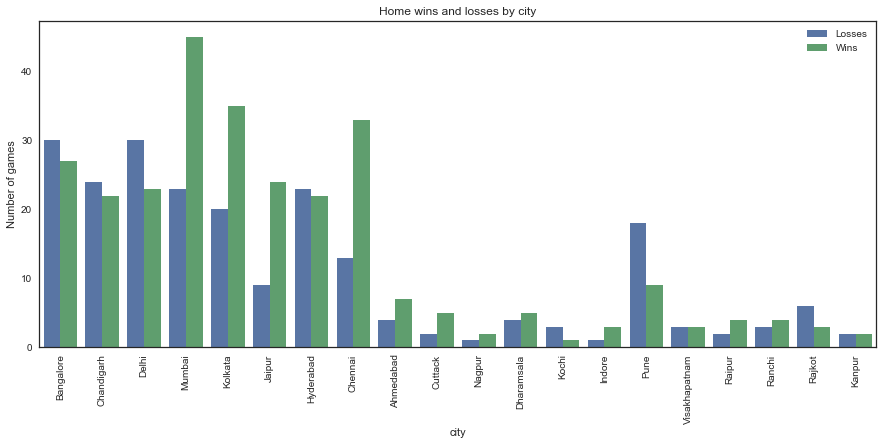

In [29]:
plt.figure(figsize=(15,6))
g = sns.countplot(x='city', hue='home_wins', data=home_bias)
plt.xticks(rotation=90)
plt.title('Home wins and losses by city')
plt.ylabel('Number of games')
plt.legend(['Losses', 'Wins'])
plt.show()

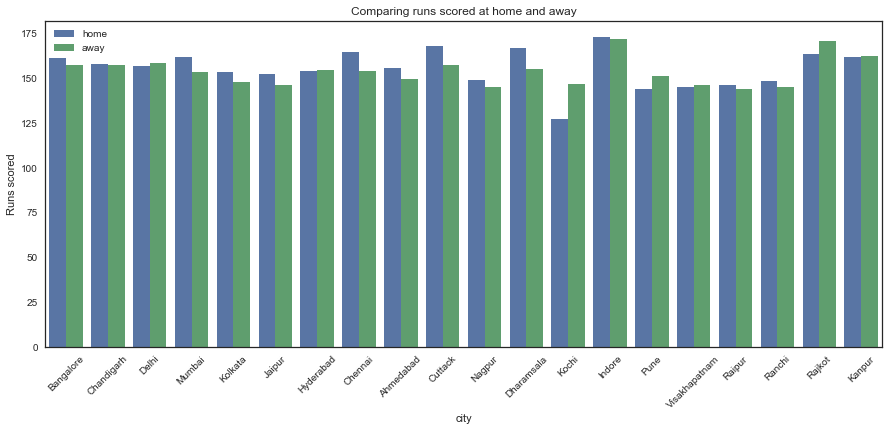

In [31]:
# Avg runs scored by home team versus away

# Keeping only necessary features
home_bias = games.loc[games.home_team != 'No home team', ['bat_1st', 'bat_2nd',
                                                          'home_team', 'runs_1st',
                                                          'runs_2nd', 'city']]
# Calculate home game runs
home_bias['home_game_runs'] = home_bias.apply(lambda x: x.runs_1st
                                              if x.home_team==x.bat_1st
                                              else x.runs_2nd, axis=1)
# Calculate away game runs
home_bias['away_game_runs'] = home_bias.apply(lambda x: x.runs_1st
                                              if x.home_team==x.bat_2nd
                                              else x.runs_2nd, axis=1)

# Keep only relevant variables and then change df to long form
home_bias.drop(['bat_1st', 'bat_2nd','home_team', 'runs_1st','runs_2nd'],
               axis=1, inplace=True)
home_bias = pd.melt(home_bias, id_vars='city', var_name='home_away', value_name='runs')


plt.figure(figsize=(15,6))
sns.barplot(x='city', y='runs', hue='home_away', data=home_bias, ci=None)
plt.legend(['home', 'away'], loc='best')
plt.title('Comparing runs scored at home and away')
plt.ylabel('Runs scored')
plt.xticks(rotation=45)
plt.show()


## What impact does the pitch have?

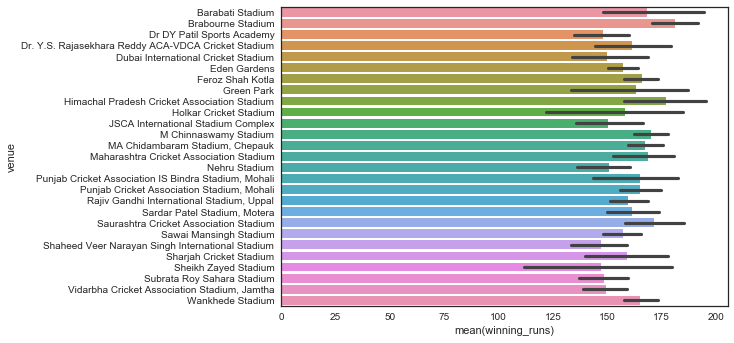

In [223]:
# Average runs scored by venue

# venues = (games.runs_1st.groupby(games.venue).sum() + 
#           games.runs_2nd.groupby(games.venue).sum()) / games.runs_1st.groupby(games.venue).count()

# venues = pd.DataFrame(venues, columns=['total_runs']).reset_index()
# venues.sort_values(by=['total_runs'], inplace=True)

venues = games.loc[:, ['venue', 'winning_runs']]
venues.sort_values(by=['venue'], inplace=True)


sns.barplot(y='venue', x='winning_runs', data=venues)


# venues.sort_values(inplace=True, ascending=False)



## How much do the top batsman in the team contribute?

In [34]:
# Use df of batting scores by all players created in the data notebook
batting = pd.read_csv('IPL_batting.csv')

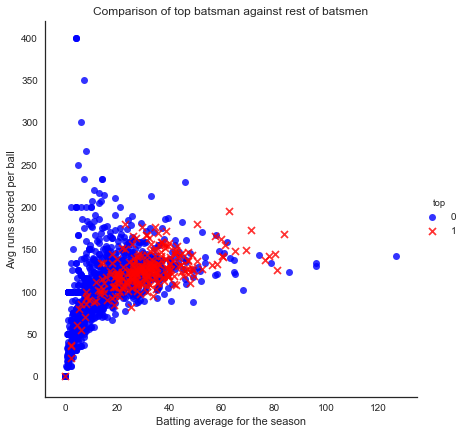

In [35]:
# Finding the top 7batsman by average in each team
def best_in_team(batting, year, k):
    ''' Takes in batting df
    Returns list top k batsman for each team'''
    top6list = []
    for team in batting.loc[batting.season==year, 'batting_team'].unique():
        temp = batting.loc[(batting.season==year) & (batting.batting_team==team), ['batsman', 'runs_scored']]
        temp.sort_values('runs_scored', ascending=False, inplace=True)
        # Only use first 5 letters to avoid having to deal with spaces
        top6list += list(temp.iloc[0:k, 0])
    return top6list

# Use look only at top batsman, use top 7 for team averages (see data notebook)
bestbats17 = best_in_team(batting, 2017, 1)
bestbats16 = best_in_team(batting, 2016, 1)
bestbats15 = best_in_team(batting, 2015, 1)
bestbats14 = best_in_team(batting, 2014, 1)
bestbats13 = best_in_team(batting, 2013, 1)
bestbats12 = best_in_team(batting, 2012, 1)
bestbats11 = best_in_team(batting, 2011, 1)
bestbats10 = best_in_team(batting, 2010, 1)
bestbats08 = best_in_team(batting, 2008, 1)

batting['top17'] = batting.batsman.apply(lambda x: 1 if x in bestbats17 else 0)
batting['top16'] = batting.batsman.apply(lambda x: 1 if x in bestbats16 else 0)
batting['top15'] = batting.batsman.apply(lambda x: 1 if x in bestbats15 else 0)
batting['top14'] = batting.batsman.apply(lambda x: 1 if x in bestbats14 else 0)
batting['top13'] = batting.batsman.apply(lambda x: 1 if x in bestbats13 else 0)
batting['top12'] = batting.batsman.apply(lambda x: 1 if x in bestbats12 else 0)
batting['top11'] = batting.batsman.apply(lambda x: 1 if x in bestbats11 else 0)
batting['top10'] = batting.batsman.apply(lambda x: 1 if x in bestbats10 else 0)
batting['top08'] = batting.batsman.apply(lambda x: 1 if x in bestbats08 else 0)

batting['top'] = batting.apply(lambda x: 1 if (x.top17 +
                                               x.top16 +
                                               x.top15 +
                                               x.top14 +
                                               x.top13 +
                                               x.top12 +
                                               x.top11 +
                                               x.top10 + 
                                               x.top08) > 0 else 0, axis=1)
#batting['top_bats'] = batting.top.apply(lambda x: 1 if x>0 else 0)

#Finally
g = sns.lmplot(x='avgs', y='strike_rate',
           data=batting, hue = 'top', markers=["o", "x"], palette = {0:'b', 1:'r'},
           fit_reg=False, size=6)
plt.title('Comparison of top batsman against rest of batsmen')
plt.ylabel('Avg runs scored per ball')
plt.xlabel('Batting average for the season')
plt.show()


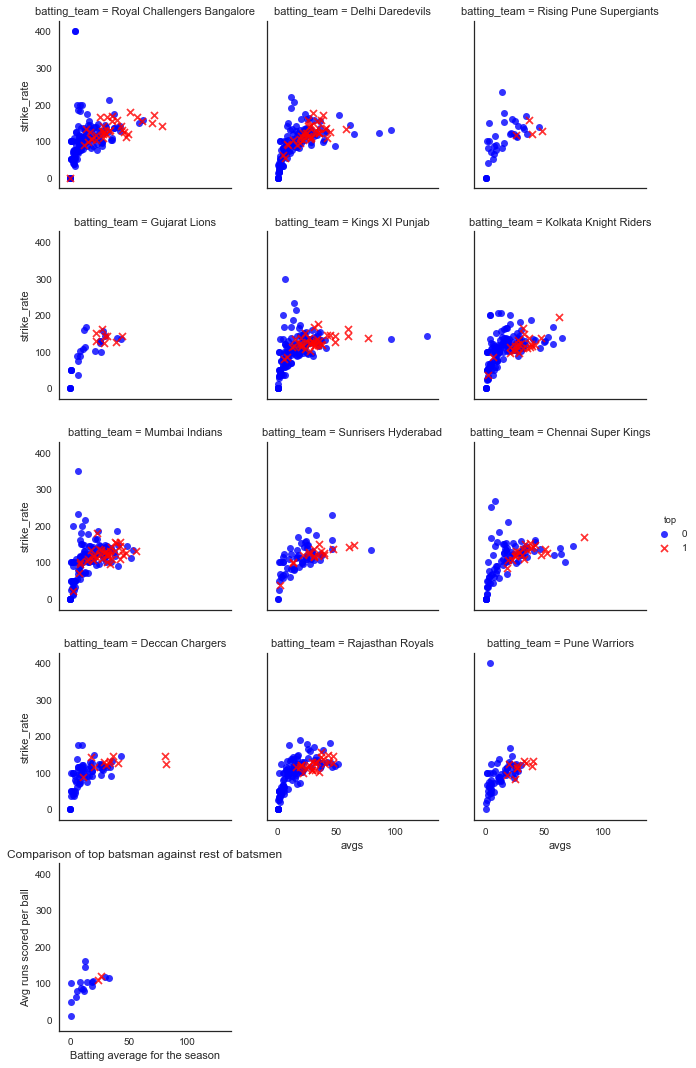

In [56]:
sns.lmplot(x='avgs', y='strike_rate', data=batting, hue = 'top',
           fit_reg=False, col='batting_team', col_wrap=3, size=3,
          markers=["o", "x"], palette = {0:'b', 1:'r'})
plt.title('Comparison of top batsman against rest of batsmen')
plt.ylabel('Avg runs scored per ball')
plt.xlabel('Batting average for the season')
plt.show()

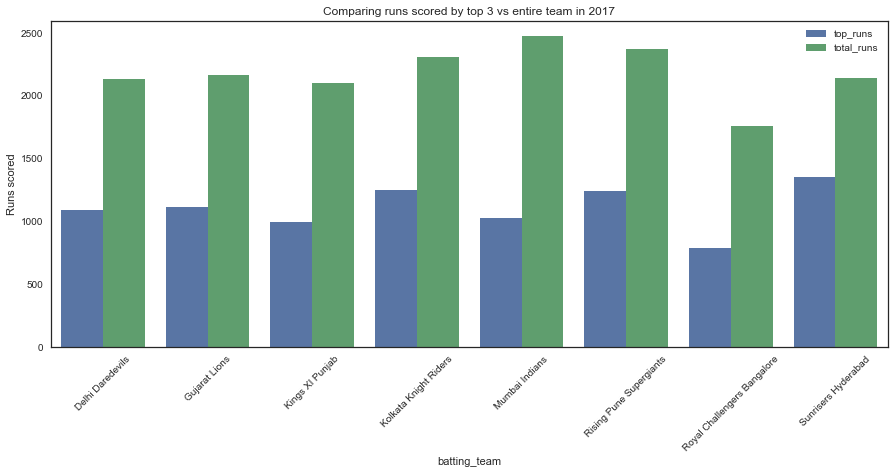

In [45]:
# How much do top batsman contribute to overall runs?

# Reuse code from above (this time for 3 batsman)
bestbats17 = best_in_team(batting, 2017, 3)
bestbats16 = best_in_team(batting, 2016, 3)
bestbats15 = best_in_team(batting, 2015, 3)
bestbats14 = best_in_team(batting, 2014, 3)
bestbats13 = best_in_team(batting, 2013, 3)
bestbats12 = best_in_team(batting, 2012, 3)
bestbats11 = best_in_team(batting, 2011, 3)
bestbats10 = best_in_team(batting, 2010, 3)
bestbats08 = best_in_team(batting, 2008, 3)

batting['top17'] = batting.batsman.apply(lambda x: 1 if x in bestbats17 else 0)
batting['top16'] = batting.batsman.apply(lambda x: 1 if x in bestbats16 else 0)
batting['top15'] = batting.batsman.apply(lambda x: 1 if x in bestbats15 else 0)
batting['top14'] = batting.batsman.apply(lambda x: 1 if x in bestbats14 else 0)
batting['top13'] = batting.batsman.apply(lambda x: 1 if x in bestbats13 else 0)
batting['top12'] = batting.batsman.apply(lambda x: 1 if x in bestbats12 else 0)
batting['top11'] = batting.batsman.apply(lambda x: 1 if x in bestbats11 else 0)
batting['top10'] = batting.batsman.apply(lambda x: 1 if x in bestbats10 else 0)
batting['top08'] = batting.batsman.apply(lambda x: 1 if x in bestbats08 else 0)

# Reorganizing to show by team
temp = pd.pivot_table(batting.loc[batting.season==2017, :],
                      values='runs_scored', index='batting_team', columns=['top17'], aggfunc=sum)
#Rename column and reset index
temp.columns=['other_runs', 'top_runs']
temp = temp.reset_index()
# Calculate total runs and keep only top and total
temp['total_runs'] = temp.other_runs+temp.top_runs
temp.drop(['other_runs'], axis=1, inplace=True)

# Reshape to longform
temp = pd.melt(temp, id_vars='batting_team', var_name='contribution', value_name='runs')

plt.figure(figsize=(15,6))
sns.barplot(x='batting_team', y='runs', hue='contribution', data=temp, ci=None)
plt.legend(loc='best')
plt.title('Comparing runs scored by top 3 vs entire team in 2017')
plt.ylabel('Runs scored')
plt.xticks(rotation=45)
plt.show()

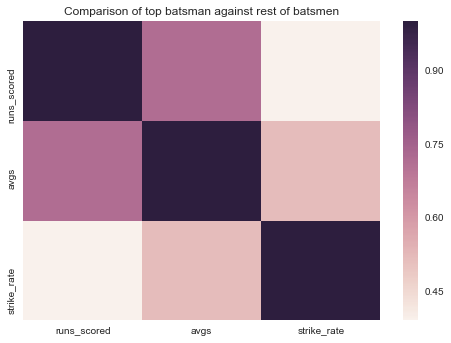

In [423]:
corr = batting.loc[:, ['runs_scored', 'avgs', 'strike_rate']].corr()


sns.heatmap(corr)
plt.title('Comparison of top batsman against rest of batsmen')
plt.show()

## Impact of bowlers

In [37]:
bowling = pd.read_csv('IPL_bowling.csv')

In [453]:
bowling.head()

,bowler,bowling_team,balls_bowled,wickets,balls_bowled_2,runs,season,bowling_avg,economy,strike_rate
0,A Kumble,Royal Challengers Bangalore,236,7,236,314,2008,44.857143,7.983051,33.714286
1,A Mishra,Delhi Daredevils,111,10,111,119,2008,11.900000,6.432432,11.100000
2,A Nehra,Mumbai Indians,280,12,280,357,2008,29.750000,7.650000,23.333333
3,A Nel,Mumbai Indians,18,1,18,31,2008,31.000000,10.333333,18.000000
4,A Symonds,Deccan Chargers,44,0,44,106,2008,0.000000,14.454545,0.000000


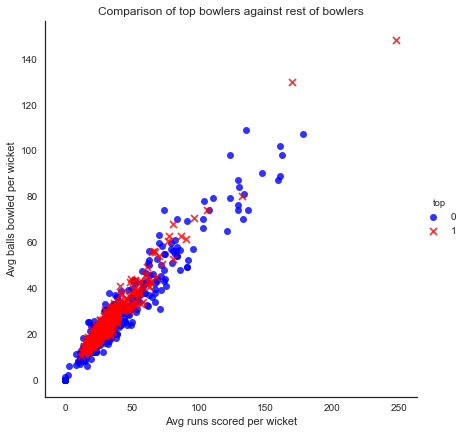

In [38]:
# Method to find top bolwers is a bit easier
# Note: Higher number of balls required than for team avg
bowling['top'] = bowling.balls_bowled.apply(lambda x: 1 if x > 120 else 0)

#Finally
g = sns.lmplot(x='bowling_avg', y='strike_rate',
           data=bowling, hue = 'top', markers=["o", "x"], palette = {0:'b', 1:'r'},
           fit_reg=False, size=6)
plt.title('Comparison of top bowlers against rest of bowlers')
plt.ylabel('Avg balls bowled per wicket')
plt.xlabel('Avg runs scored per wicket')
plt.show()



In [471]:
bowling.top.value_counts()

0    576
1    442
Name: top, dtype: int64

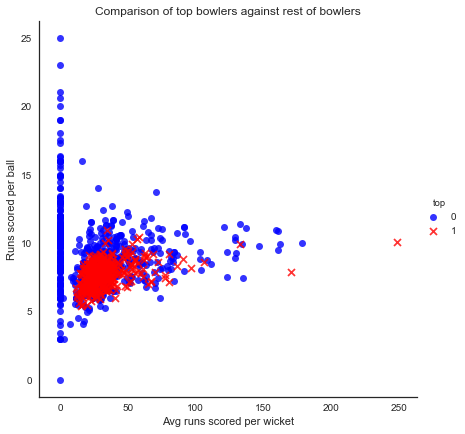

In [39]:
g = sns.lmplot(x='bowling_avg', y='economy',
           data=bowling, hue = 'top', markers=["o", "x"], palette = {0:'b', 1:'r'},
           fit_reg=False, size=6)
plt.title('Comparison of top bowlers against rest of bowlers')
plt.ylabel('Runs scored per ball')
plt.xlabel('Avg runs scored per wicket')
plt.show()

## Clustering teams